# Activity: Address missing data 

## Introduction

In this activity, I will try to address missing data. 

Scenario is an investor has tasked me to identify new business opportunities. To help them decide which future companies to invest in, I will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." Client will use this information to learn about profitable businesses in general.

The investor has asked me to provide them with the following data: 
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)


## **Step 1: Imports** 

### Import libraries

Import the following relevant Python libraries:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `plotly.express`
* `seaborn`



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Load the dataset


In [2]:
df_companies = pd.read_csv("Unicorn_Companies.csv")

## **Step 2: Data exploration** 


In [3]:
df_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Statistical properties of the dataset

In [4]:
df_companies.shape

(1074, 10)

In [5]:
# Get the data types and number of non-null values in the dataset.
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [6]:
# Get the range of different values in the dataset.

df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


**Question: In what year was the oldest company founded?**
-  The oldest company in the list was founded in 1919. This is the minimum value in `Year Funded`.

### Data preprocessing

In [7]:
# Create a new column "Year Joined" from "Date Joined".
df_companies['Year Joined']= pd.to_datetime(df_companies['Date Joined']).dt.year

Now, prepare the dataset to create a sum of valuations in each country. Currently, the `Valuation` is a string that starts with a `$` and ends with a `B`. Because this column is not in a numeric datatype, it is impossible to properly sum these values. To convert `Valuation` column to numeric, first remove the `$` and `B` symbols from the column and save the results to a new `Valuation_num` column. 

In [8]:
# Remove the extra characters from the Valuation column.
df_companies['Valuation_num']= df_companies['Valuation'].str.strip('$B')

In [9]:
# Convert the column to numeric
df_companies['Valuation_num']= pd.to_numeric(df_companies['Valuation_num'])

### Find missing values

The unicorn companies dataset is fairly clean, with few missing values. 

In [10]:
# Find the number of missing values in each column in this dataset.
df_companies.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
Valuation_num        0
dtype: int64

 **Question: How many missing values are in each column in the dataset?**
 - There is a single missing value in the `Select Investors` column and 16 missing `cities`. There are no missing values in other columns. 

### Review rows with missing values

In [11]:
# Filter the DataFrame to only include rows with at least one missing value.
# Assign the filtered results to a variable named "df_rows_missing" and display the contents of the variable.
df_rows_missing= df_companies[df_companies.isna().any(axis=1)]
df_rows_missing

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_num
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Which column has the most data missing?**
- `City`

### Context-specific missing values

Sometimes, there may be other types of values that are considered missing, such as empty strings and `-1`, `0`, `NaN`, and `NA`. Using one representation for all these missing values is beneficial. Replace any missing values in the dataset with `np.nan`, accessed from the `numpy` library, to simplify the missing values imputation process. 


Without replacing the original DataFrame, replace 'Asia' with `np.nan`. Then, find the number of missing values in the dataset.


In [12]:
# Find the number of missing values after replacing 'Asia' with `np.nan`.
df_companies.replace('Asia', np.nan).isna().sum()

Company               0
Valuation             0
Date Joined           0
Industry              0
City                 16
Country/Region        0
Continent           310
Year Founded          0
Funding               0
Select Investors      1
Year Joined           0
Valuation_num         0
dtype: int64

**Question: How many values went missing after changing 'Asia' with `np.nan`?**
- 310 rows

## Step 3: Model building



### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and missing values imputation. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.


To compare the the effect of different actions, first store the original number of values in a variable.

In [13]:
# Store the total number of values in a variable
count_total= df_companies.size
count_total

12888

Now, remove the missing values and count the total number of values in the dataset. Remove all rows containing missing values and store the total number of cells in a variable called `count_dropna_rows`.

In [14]:
# Drop the rows containing missing values. 
count_dropna_rows= df_companies.dropna().size
count_dropna_rows

12684

Now, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.

In [15]:
# Drop the columns containing missing values.
count_dropna_columns= df_companies.dropna(axis=1).size
count_dropna_columns

10740

Next, print the percentage of values removed by each method and compare them.

In [16]:
# Print the percentage of values removed by dropping rows.

print(count_dropna_rows/count_total*100)

# Print the percentage of values removed by dropping columns.

print(count_dropna_columns/count_total*100)

98.4171322160149
83.33333333333334


**Question: Which method was most effective? Why?**
- The percentage removed was significantly higher for columns than it was for rows. Since both approaches result in a dataset with no missing values, the "most effective" method depends on how much data I have and what I want to do with it. It might be best to use the way that leaves the most data intact&mdash;in this case, dropping rows.

Try the second method: imputation. Begin by filling missing values using the backfill method. Then, show the rows that previously had missing values.

In [17]:
# Fill missing values using 'backfill' method.
df_companies_backfill= df_companies.fillna(method='backfill')

# Showing the rows that previously had missing values.
df_companies_backfill.loc[df_rows_missing.index]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_num
12,FTX,$32B,7/20/21,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Do the values that were used to fill in for the missing values make sense?**
- - No, the values seem to be added without consideration of the country those cities are located in.

## Step 4: Results and evaluation

### Companies in the `Hardware` Industry



In [18]:
# Investing search criteria provided as a DataFrame.

df_search=pd.DataFrame({
        'City':['Beijing', 'San Francisco', 'London', 'London'],
        'Industry':['Hardware', 'Hardware', 'Artificial intelligence', 'Hardware']
        })
df_invest=df_search.merge(df_companies, on=['City', 'Industry'])
print(df_invest[['City', 'Industry', 'Company']])

            City                 Industry              Company
0        Beijing                 Hardware              Bitmain
1        Beijing                 Hardware              Chipone
2        Beijing                 Hardware                Geek+
3        Beijing                 Hardware  TERMINUS Technology
4  San Francisco                 Hardware              Density
5         London  Artificial intelligence         BenevolentAI
6         London  Artificial intelligence            Tractable
7         London                 Hardware        Global Switch


### List of countries by sum of valuation

In [19]:
#Group the data by`Country/Region`

df_companies_sum=df_companies.groupby(['Country/Region'])['Valuation_num'].sum().sort_values(ascending=False).reset_index()

print(df_companies_sum.head(15))

    Country/Region  Valuation_num
0    United States           1933
1            China            696
2            India            196
3   United Kingdom            195
4          Germany             72
5           Sweden             63
6        Australia             56
7           France             55
8           Canada             49
9      South Korea             41
10          Israel             39
11          Brazil             37
12         Bahamas             32
13       Indonesia             28
14       Singapore             21


Suppose investor specified that the 4 countries with the highest sum of valuation should not be included in the list. Start by creating a boxplot to visualize the outliers. 

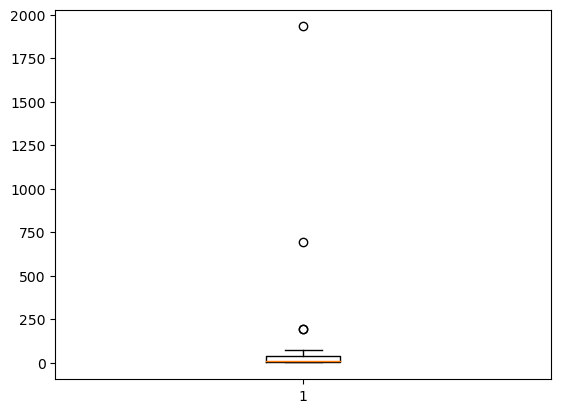

In [20]:
# Create a boxlot to identify outliers.

plt.boxplot(df_companies_sum['Valuation_num'])

plt.show()

In order to visualize the rest of the data properly, consider United States, China, India, and the United Kingdom outliers and remove them.

In [21]:
# Remove outlier countries.

df_companies_sum_outliers_removed= df_companies_sum[~df_companies_sum['Country/Region'].isin(
    ['China', 'United States', 'India', 'United Kingdom'])]


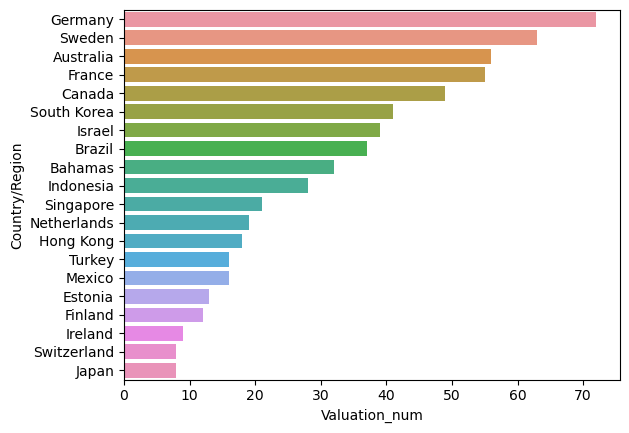

In [22]:
# Create a barplot to compare the top 20 countries with highest company valuations.

sns.barplot(data= df_companies_sum_outliers_removed.head(20),
           x= 'Valuation_num',
           y= 'Country/Region')

plt.show()

### Plot maps

As investor has also asked for: 
 - A global valuation map of all countries with companies that joined the list after 2020
 - A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` and a separate map for Europe 



In [24]:
# Plot the sum of valuations per country.

px.scatter_geo(df_companies_sum[
    df_companies['Year Joined']>2020
    ], locations='Country/Region', size= 'Valuation_num', locationmode= 'country names', color= 'Country/Region')


2023-06-10 22:58:22,547 [6696] WARNING  py.warnings:109: [JupyterRequire] C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6696\2425489100.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.




In [25]:
# Plot the sum of valuations per country.

fig= px.scatter_geo(df_companies_sum_outliers_removed,
                   locations= 'Country/Region',
                   size= 'Valuation_num',
                   locationmode= 'country names',
                   color= 'Country/Region',
                   title= 'Global Unicorn Company Values')

# Show the plot.
fig.show()

To create the same map for `europe` only, update the `fig` object to add a new title and also limit the scope of the map to `europe`.

In [26]:
# Update the figure layout.

fig.update_layout(
       title= 'Europe Unicorn Value Companies',
        geo_scope= 'europe')

# Show the plot again.
fig.show()